# Startup-Acquisition-Status-Prediction


In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
matplotlib.rcParams['figure.figsize'] = (8,5)
pd.set_option('display.max_columns', None)

In [3]:
data_df = pd.read_csv('~/Documents/Internship/Startup-Acquisition-Status-Prediction/data/companies.csv')

# Data Cleaning

### 1. Data Overview

In [4]:
data_df.columns

Index(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at', 'lat', 'lng', 'ROI'],
      dtype='object')

In [5]:
data_df.head()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,founded_at,closed_at,domain,homepage_url,twitter_username,logo_url,logo_width,logo_height,short_description,description,overview,tag_list,country_code,state_code,city,region,first_investment_at,last_investment_at,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,http://wetpaint-inc.com,BachelrWetpaint,http://s3.amazonaws.com/crunchbase_prod_assets...,401.0,54.0,NaN,Technology Platform Company,Wetpaint is a technology platform company that...,"wiki, seattle, elowitz, media-industry, media-...",USA,WA,Seattle,Seattle,NaN,NaN,NaN,NaN,2005-10-01,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,NaN,NaN,flektor.com,http://www.flektor.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,186.0,85.0,NaN,NaN,Flektor is a rich-media mash-up platform that ...,"flektor, photo, video",USA,CA,Culver City,Los Angeles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,NaN,NaN,there.com,http://www.there.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,107.0,34.0,NaN,NaN,There.com is an online virtual world where any...,"virtualworld, there, teens",USA,CA,San Mateo,SF Bay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,2008-07-26,NaN,mywebbo.com,http://www.mywebbo.com,NaN,NaN,NaN,NaN,NaN,NaN,"BRAND NEW ONLINE SOCIAL NETWORKING WEBSITE,FOR...","social-network, new, website, web, friends, ch...",NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,2008-07-26,NaN,themoviestreamer.com,http://themoviestreamer.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,200.0,74.0,NaN,NaN,This company shows free movies online on their...,"watch, full-length, moives, online, for, free,...",NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN


> By looking at the info and data types we can clearly see that most of the coluns contains non-unique variety of data which cannot be used in our case.

## 2. Dealing with unnecessary columns
    a. Deleting 'domain','homepage_url', 'twitter_username', 'logo_url', 'logo_width','logo_height',
        'description' ,'overview','tag_list', 'state_code', 'city', 'region','created_by','created_at', 'updated_at' 
         'short_description', columns as this data contains irrelevant and redundant information

In [6]:
# Droping first 7 columns 
data_df.drop(data_df.columns[:8],axis=1,inplace=True)
# Droping other unnecessary columns
data_df.drop(['domain','homepage_url', 'twitter_username', 'logo_url', 'logo_width',
       'logo_height', 'short_description', 'description', 'overview','tag_list', 'state_code', 'city', 'region',
       'created_by','created_at', 'updated_at'],axis=1,inplace=True)

    b. Deleting `closed_at`,`first_investment_at`,`last_investment_at`, `investment_rounds`, `invested_companies` ,`ROI` column 
        as these column contains more than 98% of null values 

In [7]:
print("Percentage of nan values in each columns:")
data_df.isna().mean() * 100

Percentage of nan values in each columns:


category_code          37.326828
status                  0.000000
founded_at             53.586564
closed_at              98.667026
country_code           55.233448
first_investment_at    98.685851
last_investment_at     98.685851
investment_rounds      98.681780
invested_companies     98.681780
first_funding_at       83.970227
last_funding_at        83.970227
funding_rounds         83.868473
funding_total_usd      85.818583
first_milestone_at     53.346426
last_milestone_at      53.346426
milestones             53.346426
relationships          34.029498
lat                    57.338733
lng                    57.338733
ROI                    99.630634
dtype: float64

In [8]:
# Droping some columns having > 98% of null values
data_df.drop(['first_investment_at','last_investment_at','investment_rounds','invested_companies','ROI'],axis=1,inplace=True)

    c. Deleting duplicate values

In [9]:
# Deleting duplicate data keeping the first and removing other duplicacy
data_df.drop(data_df[data_df.duplicated()].index,inplace=True)

## 3.Dealing with missing values and outliers

    a. Droping nan values of 'category_code','status','country_code' & 'founded_at' columns 

In [10]:
# Deleting null values of 'category_code','status','country_code'&'founded_at' columns
data_df.dropna(subset=['category_code','status','country_code','founded_at'],inplace=True)

    b. Removing outliers

> - funding_total_usd

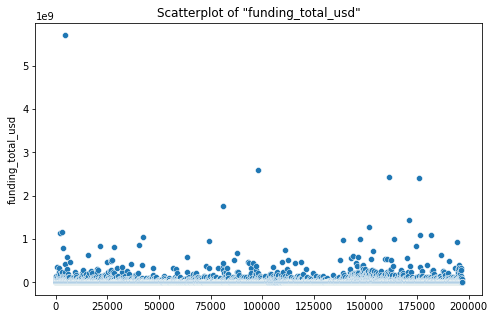

In [11]:
# plotting funding_total_usd column
sns.scatterplot(x=data_df.index,y=data_df.funding_total_usd)
plt.title('Scatterplot of "funding_total_usd"')
plt.show()

In [12]:
#detecting & drpoing Outlier with iqr Method
Q1_usd = data_df.funding_total_usd.quantile(0.25)
Q3_usd =data_df.funding_total_usd.quantile(0.75)
print(f'Quartile 1 for funding usd is: {Q1_usd}\n\nQuartile 3 for funding usd is: {Q3_usd}\n')
IQR_usd = Q3_usd - Q1_usd
print(f'Inter Quartile range for funding usd is: {IQR_usd}\n')


lower_limit_usd = Q1_usd - 1.5*IQR_usd
upper_limit_usd = Q3_usd + 1.5*IQR_usd
print(f'Lower limit for funding usd is: {lower_limit_usd}\n\nLower limit for funding usd is: {upper_limit_usd}\n')


outlier_usd=data_df[(data_df.funding_total_usd<lower_limit_usd) | (data_df.funding_total_usd>upper_limit_usd)]
print("\n\noutlier in fundiding total usd")
outlier_usd

Quartile 1 for funding usd is: 511038.0

Quartile 3 for funding usd is: 12000000.0

Inter Quartile range for funding usd is: 11488962.0

Lower limit for funding usd is: -16722405.0

Lower limit for funding usd is: 29233443.0



outlier in fundiding total usd


,category_code,status,founded_at,closed_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
0,web,operating,2005-10-17,NaN,USA,2005-10-01,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,17.0,47.606209,-122.332071
19,health,operating,2007-10-01,NaN,USA,2008-10-10,2013-08-13,5.0,68069200.0,NaN,NaN,NaN,14.0,37.774929,-122.419415
24,analytics,operating,2006-01-01,NaN,USA,2008-08-25,2013-03-28,3.0,33000000.0,2010-05-18,2013-03-01,3.0,19.0,37.774929,-122.419415
66,mobile,acquired,2005-01-01,NaN,USA,2005-03-01,2012-07-02,7.0,121500000.0,2012-01-19,2013-08-13,3.0,45.0,42.360082,-71.058880
80,games_video,operating,2003-04-01,NaN,USA,2006-08-28,2012-01-01,3.0,95097200.0,2009-11-12,2013-01-01,3.0,28.0,37.774929,-122.419415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196290,mobile,operating,2001-01-01,NaN,DEU,2002-02-13,2009-12-15,5.0,40673570.0,2002-02-01,2002-02-01,1.0,11.0,48.027728,11.586918
196298,hardware,operating,1995-01-01,NaN,USA,2008-08-19,2010-12-21,3.0,146000000.0,2009-05-01,2010-07-15,3.0,23.0,37.485215,-122.236355
196415,security,operating,1997-01-01,NaN,USA,2005-02-07,2005-02-07,1.0,108000000.0,2011-07-01,2013-02-21,3.0,17.0,39.920541,-105.086650
196496,games_video,acquired,2004-01-01,NaN,CHN,2005-01-01,2011-02-04,4.0,286500000.0,2009-05-01,2011-02-04,2.0,3.0,31.230390,121.473702


In [13]:
# Droping outlier rows
data_df.drop(outlier_usd.index,inplace=True)

> - funding_rounds

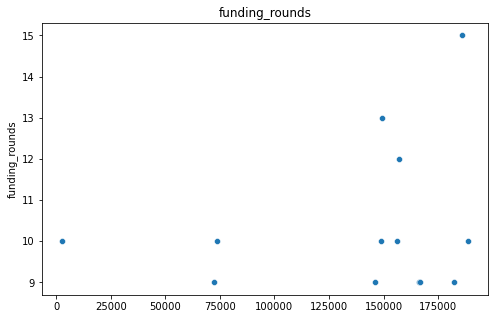

In [14]:
# ploting datas with values of 'funding_rounds'>8 as it will be easy to spot outliers
funding_round = data_df[data_df['funding_rounds']>8]['funding_rounds']
plt.title('funding_rounds')
sns.scatterplot(x = funding_round.index, y =funding_round)
plt.show()

We can clearly see outlier data above 2e+9 in the plot. So now removing outliers from both columns as,

In [15]:
#detecting & drpoing Outlier with iqr Method
Q1_rounds = data_df.funding_rounds.quantile(0.25)
Q3_rounds =data_df.funding_rounds.quantile(0.75)
print(f'Quartile 1 for funding rounds is: {Q1_usd}\n\nQuartile 3 for funding rounds is: {Q3_usd}\n')
IQR_rounds = Q3_rounds - Q1_rounds
print(f'Inter Quartile range for funding rounds is: {IQR_rounds}\n')


lower_limit_rounds = Q1_rounds - 1.5*IQR_rounds
upper_limit_rounds = Q3_rounds + 1.5*IQR_rounds
print(f'Lower limit for funding rounds is: {lower_limit_usd}\n\nLower limit for funding rounds is: {upper_limit_usd}\n')


outlier_rounds=data_df[(data_df.funding_rounds<lower_limit_rounds) | (data_df.funding_rounds>upper_limit_rounds)]
print("\n\n Outlier in fundiding rounds is: ")
outlier_rounds

Quartile 1 for funding rounds is: 511038.0

Quartile 3 for funding rounds is: 12000000.0

Inter Quartile range for funding rounds is: 1.0

Lower limit for funding rounds is: -16722405.0

Lower limit for funding rounds is: 29233443.0



 Outlier in fundiding rounds is: 


,category_code,status,founded_at,closed_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
298,software,acquired,2002-01-01,NaN,USA,2009-04-02,2011-07-12,5.0,13900000.0,2009-07-16,2013-04-23,3.0,5.0,47.606209,-122.332071
448,software,operating,2002-02-01,NaN,USA,2002-05-22,2013-04-01,4.0,14734000.0,2012-09-20,2012-09-20,1.0,8.0,32.814018,-96.948894
485,games_video,operating,2007-03-01,NaN,USA,2007-04-01,2008-12-23,4.0,18000000.0,2012-12-01,2013-08-26,2.0,16.0,37.562992,-122.325525
505,finance,operating,2011-05-11,NaN,USA,2011-09-10,2013-03-06,5.0,5395000.0,2012-08-24,2012-08-24,1.0,4.0,39.103118,-84.512020
571,public_relations,operating,2007-09-01,NaN,USA,2008-01-01,2013-01-03,4.0,1682618.0,2010-03-16,2010-03-16,1.0,7.0,38.402136,-122.823881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196256,software,operating,2006-01-01,NaN,USA,2007-02-20,2013-01-30,4.0,13269616.0,2010-08-01,2010-08-01,1.0,13.0,38.252665,-85.758456
196289,mobile,operating,2004-01-01,NaN,USA,2004-01-01,2009-11-05,4.0,27750000.0,NaN,NaN,NaN,NaN,42.633425,-71.316172
196293,security,acquired,1999-01-01,NaN,USA,2005-02-25,2010-10-11,4.0,24500000.0,2008-01-01,2011-01-20,2.0,2.0,43.071755,-70.762553
196356,travel,operating,2010-01-01,NaN,USA,2008-05-01,2011-12-20,4.0,3265000.0,2009-08-07,2012-01-01,4.0,9.0,39.739236,-104.990251


In [16]:
# Droping the outlier rows 
data_df.drop(outlier_rounds.index,inplace=True)

> - relationships

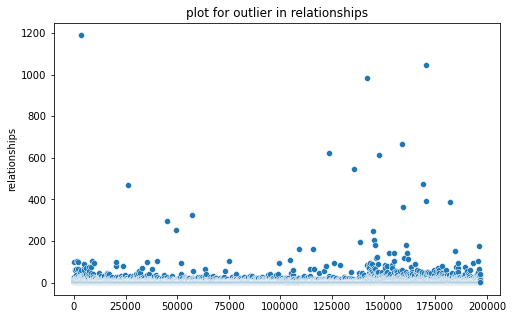

In [17]:
# Scatterplot of relationship column
sns.scatterplot(x=data_df.index,y=data_df.relationships)
plt.title('plot for outlier in relationships')
plt.show()

Here there are three outliers which are above 800 values. So now removing outliers as, 

In [18]:
# Removing outlier from realationships
Q1_relationships = data_df.relationships.quantile(0.25)
Q3_relationships = data_df.relationships.quantile(0.75)
print(f'Quartile 1 for relationships is: {Q1_relationships}\n\nQuartile 3 for relationships is: {Q3_relationships}\n')
IQR_relationships = Q3_relationships - Q1_relationships
print(f'Inter Quartile range for relationships is: {IQR_relationships}\n')


lower_limit_relationships = Q1_relationships - 1.5*IQR_relationships
upper_limit_relationships = Q3_relationships + 1.5*IQR_relationships
print(f'Lower limit for relationships is: {lower_limit_relationships}\n\nLower limit for relationships is: {upper_limit_relationships}\n')


outlier_relationships =data_df[(data_df.relationships<lower_limit_relationships) | (data_df.relationships>upper_limit_relationships)]
print("\n\n Outlier in relationships is: ")
outlier_relationships

Quartile 1 for relationships is: 1.0

Quartile 3 for relationships is: 4.0

Inter Quartile range for relationships is: 3.0

Lower limit for relationships is: -3.5

Lower limit for relationships is: 8.5



 Outlier in relationships is: 


,category_code,status,founded_at,closed_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
13,web,acquired,2007-10-01,NaN,USA,2008-02-26,2008-02-26,1.0,5000000.0,2008-05-01,2012-09-13,3.0,14.0,37.386052,-122.083851
18,mobile,acquired,2008-03-01,NaN,USA,2008-09-01,2008-09-01,1.0,NaN,1995-03-01,2012-09-18,4.0,9.0,37.441883,-122.143019
54,ecommerce,operating,2004-01-01,NaN,USA,2011-09-06,2011-09-06,1.0,NaN,2012-01-01,2012-01-01,1.0,9.0,47.610150,-122.201516
77,software,operating,1996-01-01,NaN,USA,2011-03-01,2012-04-10,2.0,840000.0,NaN,NaN,NaN,19.0,42.269522,-71.616129
83,mobile,operating,2007-10-01,NaN,USA,NaN,NaN,NaN,NaN,2008-12-01,2010-03-01,2.0,10.0,40.712775,-74.005973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196475,mobile,ipo,2001-01-01,NaN,USA,NaN,NaN,NaN,NaN,2009-01-01,2013-08-07,2.0,15.0,37.548270,-121.988572
196487,other,operating,1952-01-01,NaN,USA,NaN,NaN,NaN,NaN,2012-08-23,2012-08-23,1.0,27.0,47.751074,-120.740139
196519,enterprise,acquired,2003-01-01,NaN,USA,2006-04-01,2006-04-01,1.0,14500000.0,2006-11-01,2010-11-22,3.0,19.0,37.441883,-122.143019
196549,public_relations,operating,2007-11-01,NaN,USA,2008-08-25,2008-08-25,1.0,750000.0,2013-05-01,2013-05-01,1.0,14.0,37.338208,-121.886329


In [19]:
data_df.drop(outlier_relationships.index,axis=0, inplace=True)

> - Checking for inconsistant data

# DATA TRANSFORMATION
## Categorical data transformation
     1. Changes in original data
        a. Parsing years from 'founded_at','closed_at','first_funding_at', 'last_funding_at',
          'first_milestone_at', 'last_milestone_at' columns
        b. Generalize the categorical data i.e. 'category_code','status' & 'country_code'

    2. Adding new columns
        a. Creating new feature isClosed from status & closed_at
        b. Creating new feature activeDays
 
## Numerical data transformation
    1. Removing null values with their mean and most-frequent values

## Categorical data transformation

#### 1.a. parsing years from 'founded_at','closed_at','first_funding_at', 'last_funding_at','first_milestone_at', 'last_milestone_at' columns

In [20]:
# Resetting the index as while droping the outliers and some column missing values the index are misplaced. It can be neglected tho,
data_df.reset_index(drop=True,inplace=True)

# Extracting year value from 'founded_at','closed_at','first_funding_at','last_funding_at','first_milestone_at','last_milestone_at' columns
# And creating dataframe of each column so that it will be easier to concatinate
founded_year = pd.to_datetime(data_df['founded_at'],format="%Y-%m-%d").dt.year
closed_year = pd.to_datetime(data_df['closed_at'],format="%Y-%m-%d").dt.year
first_funding_year = pd.to_datetime(data_df['first_funding_at'],format="%Y-%m-%d").dt.year
last_funding_year = pd.to_datetime(data_df['last_funding_at'],format="%Y-%m-%d").dt.year
first_milestone_year = pd.to_datetime(data_df['first_milestone_at'],format="%Y-%m-%d").dt.year
last_milestone_year = pd.to_datetime(data_df['last_milestone_at'],format="%Y-%m-%d").dt.year

# Concatinating above dataframes along axis columns
datetime_df = pd.concat([founded_year,closed_year,first_funding_year,last_funding_year,first_milestone_year,last_milestone_year],axis=1)

#### 1.b. Generalize the categorical data i.e. 'category_code','status' & 'country_code'

In [21]:
data_df.category_code.unique()

array(['advertising', 'cleantech', 'games_video', 'software', 'mobile',
       'network_hosting', 'consulting', 'finance', 'education', 'medical',
       'manufacturing', 'web', 'enterprise', 'other', 'ecommerce',
       'public_relations', 'hardware', 'search', 'analytics', 'news',
       'government', 'security', 'biotech', 'photo_video', 'travel',
       'health', 'semiconductor', 'social', 'legal', 'transportation',
       'hospitality', 'sports', 'nonprofit', 'fashion', 'messaging',
       'music', 'design', 'local', 'real_estate', 'automotive', 'pets',
       'nanotech'], dtype=object)

In [22]:
data_df.country_code.unique()

array(['MAR', 'IND', 'USA', 'AUS', 'FRA', 'JPN', 'NLD', 'EGY', 'ISR',
       'GBR', 'THA', 'AUT', 'IRL', 'SWE', 'DEU', 'BRA', 'FIN', 'RUS',
       'SGP', 'MEX', 'CHN', 'ESP', 'ISL', 'KOR', 'TUR', 'DNK', 'PAK',
       'HUN', 'CAN', 'POL', 'GRC', 'PRT', 'BLR', 'CSS', 'MKD', 'CHE',
       'UKR', 'ITA', 'NZL', 'CZE', 'ARG', 'VNM', 'NOR', 'HRV', 'BEN',
       'CHL', 'GHA', 'ZAF', 'MYS', 'EST', 'BEL', 'SVK', 'TWN', 'CRI',
       'HKG', 'BGD', 'BOL', 'LBN', 'LUX', 'COL', 'PHL', 'ARE', 'IDN',
       'ROM', 'ANT', 'NGA', 'LKA', 'SWZ', 'VGB', 'MLT', 'SAU', 'KEN',
       'BGR', 'PER', 'LVA', 'CYP', 'LAO', 'NPL', 'MDA', 'CMR', 'UGA',
       'TUN', 'URY', 'MUS', 'VEN', 'OMN', 'ECU', 'KWT', 'JOR', 'LTU',
       'ALB', 'SVN', 'QAT', 'PST', 'REU', 'GTM', 'PCN', 'BHS', 'GEO',
       'BWA', 'DZA', 'GRD', 'GIB', 'PAN', 'MTQ', 'PRI', 'BIH', 'DMA',
       'BHR', 'SYC', 'SLE', 'TTO', 'VCT', 'ARA', 'BRB', 'NAM', 'SLV',
       'AFG', 'BLZ', 'UZB', 'LIE', 'IRN', 'ARM', 'ATG', 'UMI', 'DOM',
       'MDV', 'MMR',

In [23]:
# The total no of unique category in case of category_code is 42. one-hot encoding which is going to create a lot of columns so
# Lets Check the repetition of value in ascending order and keep the first 15 values and name 
# remaining one as other.
category_others_index = data_df['category_code'].value_counts()[15:].index
data_df['category_code'] = data_df['category_code'].replace(to_replace=category_others_index,value='other')

# The total no of unique category in case of country_code is 161.
# Lets Check the repetition of value in ascending order and keep the first 10 values and name 
# remaining one as other.
country_code_index = data_df['country_code'].value_counts()[9:].index
data_df['country_code'] = data_df['country_code'].replace(to_replace=country_code_index,value='other')

# printing the number of unique values in the replace category_code and country_code
print('Unique no of category_code : ',data_df['category_code'].nunique())
print('Unique no of country_code : ',data_df['country_code'].nunique())

Unique no of category_code :  15
Unique no of country_code :  10


Encoding with OneHotEncod

In [24]:
from sklearn.preprocessing import OneHotEncoder

In [25]:
# OneHotEncoding Category_code column
onehotencoder = OneHotEncoder(handle_unknown='ignore',sparse=False)
category_code_df = pd.DataFrame(onehotencoder.fit_transform(data_df[['category_code']]),columns=np.sort(data_df['category_code'].unique()))

# OneHotEncoding status column
status_df = pd.DataFrame(onehotencoder.fit_transform(data_df[['status']]),columns=np.sort(data_df['status'].unique()))

# OneHotEncoding country_code column
country_code_df = pd.DataFrame(onehotencoder.fit_transform(data_df[['country_code']]),columns=np.sort(data_df['country_code'].unique()))

# Concatinating onehotencoded dataframe to a single dataframe 
category_data = pd.concat([category_code_df,status_df,country_code_df],axis=1)
# Droping unnecessary dataframe 
data_df.drop(['category_code','country_code'],axis=1,inplace=True)

#### 2.a. Creating new feature isClosed from status & closed_at

In [26]:
# Creating isClose column constisting of 'closed'or'acquired' status as 1
#     and 'ipo'or'operating' status as 0 	
def isClosed(row):
    if row['status'] == 'closed' or row['status'] == 'acquired':
        return 1
    else:
        return 0
data_df['isClose'] = data_df.apply(lambda rw: isClosed(rw),axis=1)

#### 2.b. Creating new feature activeDays

In [27]:
# Converting to datetime datatypes
founded_date = pd.to_datetime(data_df['founded_at'],format="%Y-%m-%d")

# filling nan values of closed_at
def closed_at(row):
    if row['status'] == 'operating' or row['status'] == 'ipo':
        return '2013-01-01' 
    else:
        return row['closed_at']
data_df['closed_at'] = data_df.apply(lambda rw: closed_at(rw),axis=1)
data_df['closed_at'] = data_df['closed_at'].fillna('2013-01-01')

# Converting to datetime datatypes
closed_date = pd.to_datetime(data_df['closed_at'],format="%Y-%m-%d")
        
# Calculating activedays of closed company
data_df['activeDays'] = closed_date-founded_date
data_df['activeDays'] = data_df['activeDays'].dt.days

# Droping the unnecessary columns
data_df.drop(['status','founded_at','closed_at'],axis=1,inplace=True)

## Numerical data Transformation
    1.filling nan values with the most repeated and mean values

In [28]:
numerical_data = data_df.select_dtypes(exclude=['datetime','object']).copy()

In [29]:
numerical_data.sample(5)

,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,isClose,activeDays
31630,NaN,NaN,1.0,3.0,33.641216,-117.918822,0,0
47757,NaN,NaN,NaN,NaN,NaN,NaN,0,6210
36751,NaN,NaN,NaN,1.0,53.480759,-2.242631,0,5114
44404,NaN,NaN,1.0,1.0,37.774929,-122.419415,0,3511
48840,NaN,NaN,1.0,1.0,27.950575,-82.457178,0,3214


In [30]:
# filling nan values with the most repeated and mean values
numerical_data.funding_rounds.fillna(numerical_data['funding_rounds'].mode()[0],inplace=True)

numerical_data.funding_total_usd.fillna(numerical_data['funding_total_usd'].mean(),inplace=True)

numerical_data.milestones.fillna(numerical_data['milestones'].mode()[0],inplace=True)

numerical_data.relationships.fillna(numerical_data['relationships'].mean(),inplace=True)

numerical_data.lat.fillna(numerical_data['lat'].mean(),inplace=True)

numerical_data.lng.fillna(numerical_data['lng'].mean(),inplace=True)

In [31]:
numerical_data.isna().sum()

funding_rounds       0
funding_total_usd    0
milestones           0
relationships        0
lat                  0
lng                  0
isClose              0
activeDays           0
dtype: int64

## Merging and Saving final dataset

In [32]:
final_data_df = pd.concat([numerical_data,category_data],axis=1)

In [34]:
final_data_df.shape

(56580, 37)

In [35]:
final_data_df.sample(5)

,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,isClose,activeDays,advertising,biotech,consulting,ecommerce,education,enterprise,games_video,hardware,mobile,network_hosting,other,public_relations,search,software,web,acquired,closed,ipo,operating,AUS,CAN,DEU,ESP,FRA,GBR,IND,ISR,USA,other
1425,1.0,3.913330e+06,1.0,4.000000,39.952584,-75.165222,0,6940,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
35277,1.0,3.913330e+06,1.0,2.623264,13.082680,80.270718,0,1242,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
21284,2.0,4.650000e+05,1.0,6.000000,36.162664,-86.781602,0,611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11044,1.0,3.913330e+06,1.0,2.623264,37.774929,-122.419415,0,366,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5974,2.0,3.913330e+06,1.0,1.000000,37.368830,-122.036350,0,3653,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [36]:
final_data_df.to_csv('data/Final_dataset.csv',index=False)